In [2]:
NOM = "Jai"
PRENOM = "Ilyass"

In [4]:
import networkx as nx
import matplotlib.pylab as plt

import numpy as np
from random import random, seed
import math

### Question 2: Social Network Analysis with the Facebook100 Dataset

Lets use three networks from the FB100: Caltech (with 762 nodes in the LCC), MIT (which has 6402 nodes in the LCC), and Johns Hopkins (which has 5157 nodes in the LCC).

In [13]:
Caltech = nx.read_gml("C:\\Users\\jaimo\\OneDrive - Haute Ecole de la ville de Liège\\Bureau\\ILYASSPC\\TRIED\\finaleNet\\data\\Caltech36.gml")
MIT = nx.read_gml("data/MIT8.gml")
JHopking = nx.read_gml("data/Johns Hopkins55.gml")

**(a) Plot Degree Distribution**

In [14]:
# Define first Plot Degree
def plot_degreei(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  hist, bin_edges = np.histogram(degree_sequence, density=True)
  plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
  plt.xlabel(r"$k$, degree ")
  plt.ylabel(r"PDF")
  plt.ylim(1e-3, 1)
  plt.title("degree distribution")

def plot_degreeii(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins='auto')
    plt.show()




Caltech Results

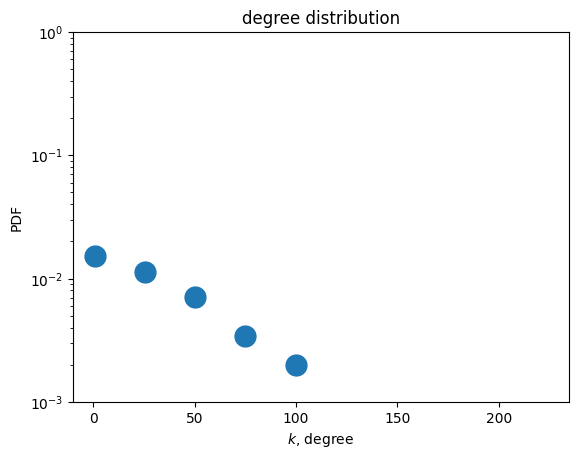

In [15]:
plot_degreei(Caltech)

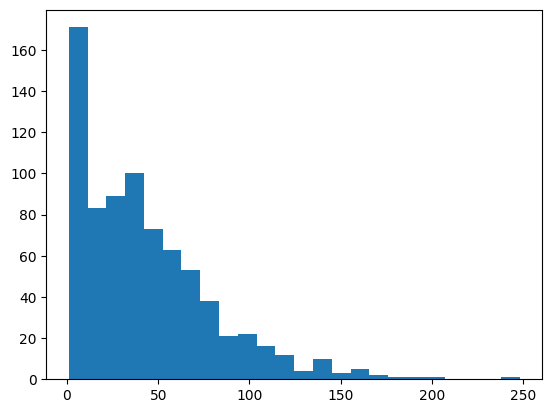

In [16]:
# Histogram
plot_degreeii(Caltech)

MIT results

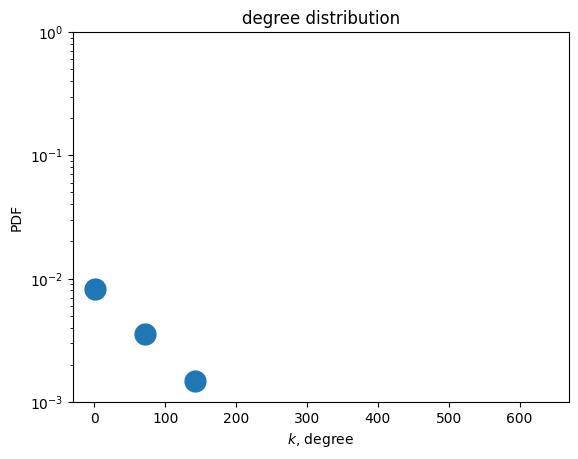

In [17]:
# Plot
plot_degreei(MIT)

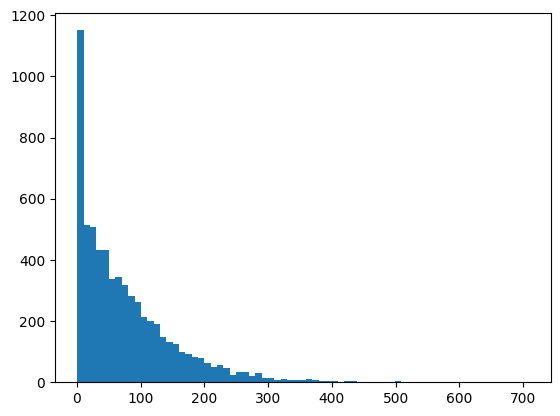

In [18]:
# Histogram
plot_degreeii(MIT)

Johns Hopkins results

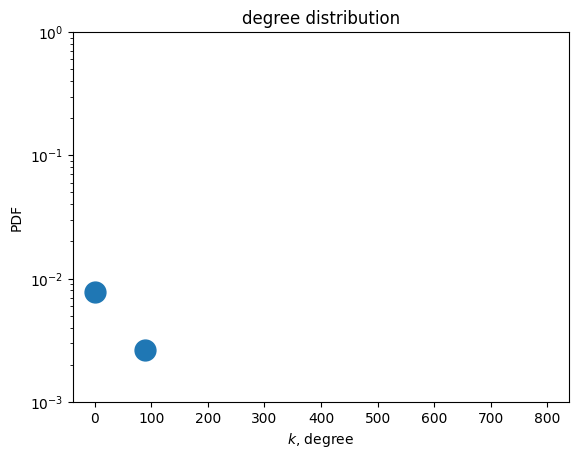

In [19]:
# Plot
plot_degreei(JHopking)

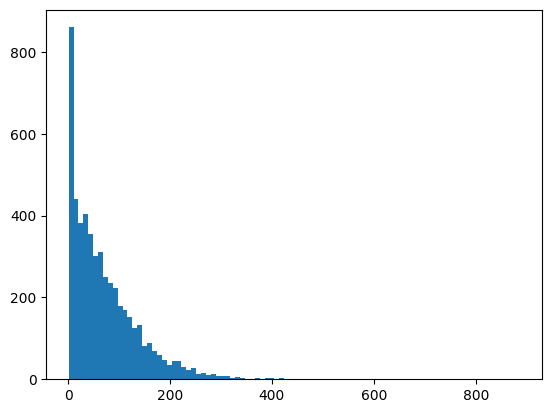

In [20]:
# Histogram
plot_degreeii(JHopking)

**What are you able to conclude from these degree distributions?**

Answer:
 * We can conclude that many people in the beginning were networked in their networks of each university only with people of the same degree, the same class, the same room having more clustering, and not with people from other faculties, even if they were in the same university or with a higher degree.
 * For different schools, the common feature is that the higher the degree, the lower the number of students
 * We can observe through the graphs that there is a great variety of highly connected nodes but of a very low degree,, possibly they are new students who do not know anyone and therefore do not have as many connections.


**(b) Compute the global clustering coefficient and mean local clustering coefficient and edge density**

In [22]:
# Global Clustering
GCCaltech = nx.transitivity(Caltech)
print('Caltech - Global Clustering : ', GCCaltech)

GCMIT = nx.transitivity(MIT)
print('MIT - Global Clustering : ', GCMIT)

GCJH = nx.transitivity(JHopking)
print('Johns Hopkins - Global Clustering : ', GCJH)

Caltech - Global Clustering :  0.2912826901150874
MIT - Global Clustering :  0.18028845093502427
Johns Hopkins - Global Clustering :  0.19316123901594015


In [23]:
# Mean Local Clustering
MCCaltech = nx.average_clustering(Caltech)
print('Caltech - Mean Local Clustering : ', MCCaltech)

MCMIT = nx.average_clustering(MIT)
print('MIT - Mean Local Clustering : ', MCMIT)

MCJH = nx.average_clustering(JHopking)
print('Johns Hopkins - Mean Local Clustering : ', MCJH)


Caltech - Mean Local Clustering :  0.40929439048517247
MIT - Mean Local Clustering :  0.2712187419501315
Johns Hopkins - Mean Local Clustering :  0.26839307371293525


In [24]:
# Edge Density
EDCaltech = nx.density(Caltech)
print('Caltech - Edge Density : ', EDCaltech)

EDMIT = nx.density(MIT)
print('MIT - Edge Density : ', EDMIT)

EDJH = nx.density(JHopking)
print('Johns Hopkins - Edge Density : ', EDJH)

Caltech - Edge Density :  0.05640442132639792
MIT - Edge Density :  0.012118119495041378
Johns Hopkins - Edge Density :  0.013910200162372396


**Should either of these networks be construed as sparse?**

Answer:
 * All three networks can be considered sparse because their edge densities are relatively low (ranging from around 1% to 6%). This makes sense in a university setting: while students form small friendship clusters, they typically do not know everyone in their faculty or across the campus.
 Most students have relatively few connections, while only a small fraction of students serve as highly connected hubs. This explains the observation that “the higher the degree, the fewer the students” who reach that degree. In other words, only a small number of individuals have an especially large number of connections

**(c) Draw a scatter plot of the degree versus local clustering coefficient**

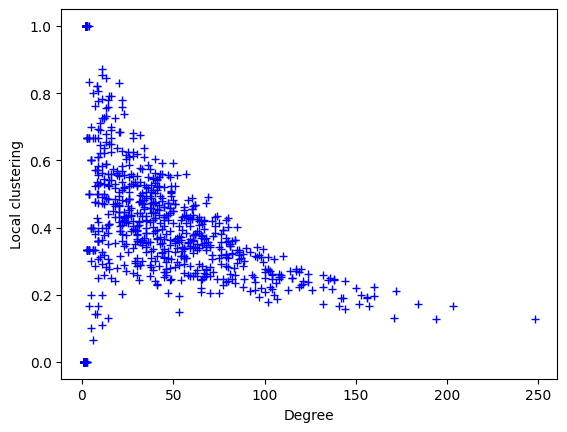

In [25]:
# Get Deg
def deg(list):
  d = 0
  for i in list:
    if i[1] > d:
      d = i[1]
  return d

# X Axis
x = [deg(Caltech.degree), deg(MIT.degree), deg(JHopking.degree)]
# Y Axis
y = [MCCaltech, MCMIT, MCJH]


degree_NCaltech = [val for (node, val) in Caltech.degree]
degree_NMIT = [val for (node, val) in MIT.degree]
degree_NJH = [val for (node, val) in JHopking.degree]
CNCaltech = nx.clustering(Caltech)
CNMIT = nx.clustering(MIT)
CNJH = nx.clustering(JHopking)



# Caltech
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NCaltech, list(CNCaltech.values()),'+', color='blue');

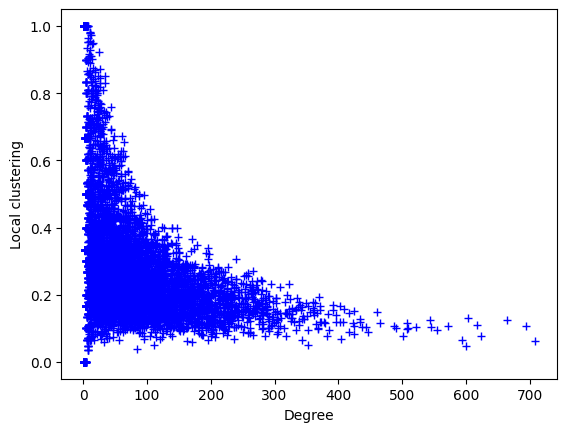

In [26]:
# MIT
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NMIT, list(CNMIT.values()),'+', color='blue');

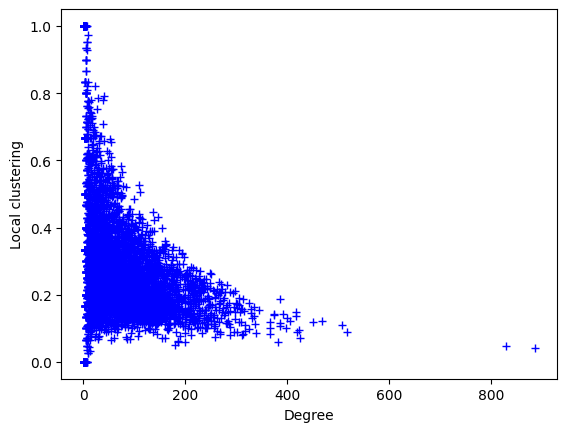

In [27]:
# Johns Hopkins
plt.xlabel(r"Degree")
plt.ylabel(r"Local clustering")

plt.plot(degree_NJH, list(CNJH.values()),'+', color='blue');

**Are you able to draw any conclusions about any similarities or differences between the tree networks? What other observations can you make?**

Answer:

* Both Johns Hopkins and MIT show an “exponential‐like” drop in local clustering as node degree increases. Nodes with lower degree often have higher local clustering because they belong to smaller, closely connected groups. By contrast, high‐degree nodes tend to have lower local clustering because, although they have many connections, those connections are less likely to be interconnected.

* Caltech shows a similar pattern but differs slightly, likely because it is a smaller network.

* Overall, all three networks display the common social‐network characteristic of many low‐degree nodes with strong local clustering, alongside a smaller group of high‐degree nodes with lower clustering.



## Question 3: Social Network Analysis with the Facebook100 Dataset

Using the FB100 networks, investigate the assortativity patterns for three vertex attributes: (i) student/faculty status, (ii) major, (iii) vertex degree, and (iiii) dorm. Treat these networks as simple graphs in your analysis.

In [48]:

G = []
num = 50
import os
fileName = os.listdir(r'C:\Users\jaimo\OneDrive - Haute Ecole de la ville de Liège\Bureau\ILYASSPC\TRIED\finaleNet\data\\')
for i in range(num):
  filePath = r'C:\Users\jaimo\OneDrive - Haute Ecole de la ville de Liège\Bureau\ILYASSPC\TRIED\finaleNet\data\\' + fileName[i]
  G.append(nx.read_gml(filePath))

In [49]:
import seaborn as sns
def assortativityPolt(item):
  aVal = []
  nSize = []
  for i in range(num):
    aVal.append(nx.attribute_assortativity_coefficient(G[i], item))
    nSize.append(G[i].size())

  plt.xlabel(r"Network Size ")
  plt.ylabel(item + "Assortativity")
  plt.xscale('log')
  plt.axhline(0, color='black')
  plt.plot(nSize, aVal, '.');
  plt.show()

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })
  plt.xlabel(item + "Assortativity")
  plt.axvline(0)

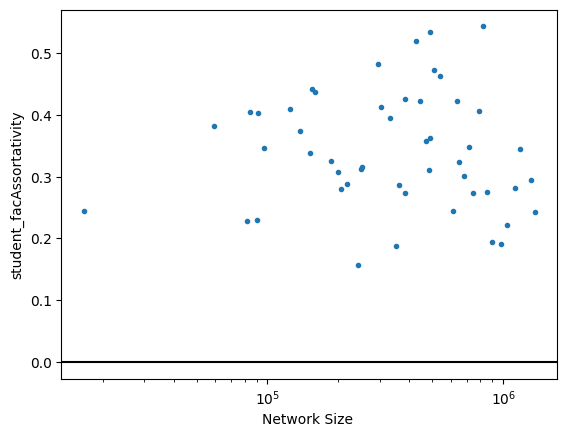

C:\Users\jaimo\AppData\Local\Temp\ipykernel_18912\1873368171.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })


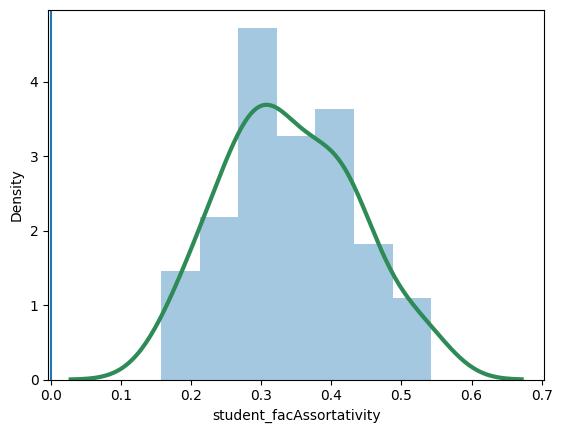

In [50]:
assortativityPolt("student_fac")

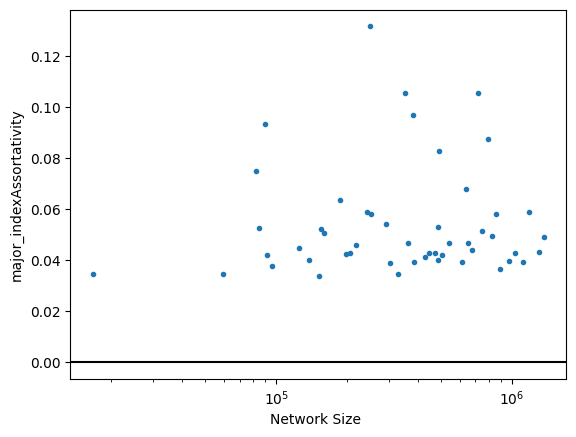

C:\Users\jaimo\AppData\Local\Temp\ipykernel_18912\1873368171.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })


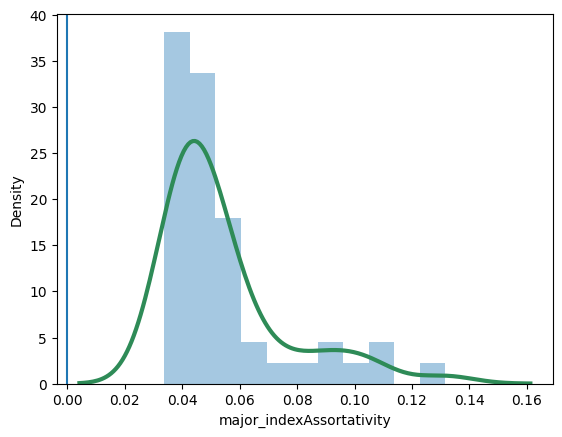

In [51]:
# major
assortativityPolt("major_index")

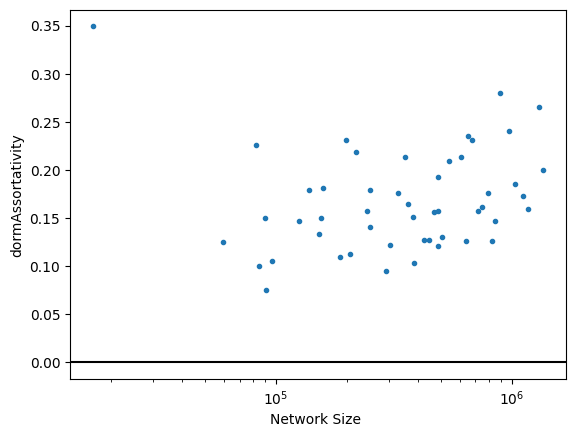

C:\Users\jaimo\AppData\Local\Temp\ipykernel_18912\1873368171.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })


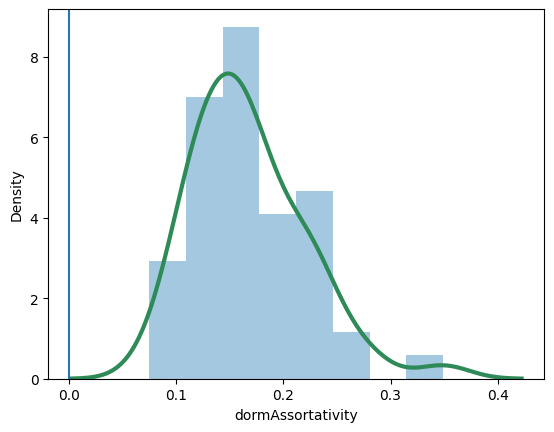

In [52]:
assortativityPolt("dorm")

### **Discuss**

Briefly discuss the degree to which vertices do or do not exhibit assortative mixing on each attribute, and speculate about what kind of processes or tendencies in the formation of Facebook friendships might produce this kind of pattern.


Answer:



*   Student Faculty: People who study in the same faculty or are in the same courses can be said to be friends in the network and therefore we can see the behavior of having a high assortativity.
*   Dorms: I can conclude that dorms have high assortativity, it makes sense because more people living in dorms or college buildings have friends from the same dorms.
*   Major : Looking at the Major results we can conclude that they are not related to making friends, that is why they have a low level of assortitivity.

In conclusion, when looking at the results of these attributes we can observe interesting behaviors which make sense. When wanting to create a friendship network, people will logically start making friends in closer nodes, for example with people who live in the same place, people who are in the same classes at the university, people who are in the same faculty.




## Question 4: link prediction

### B


In [ ]:
from abc import ABC, abstractmethod

import numpy as np
import itertools
from random import sample
import random
from random import randint
from progressbar import ProgressBar  


class LinkPrediction(ABC):
    def __init__(self, graph):
        
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        """
        Return the list of neighbors of a node.
        
        """
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self):
        """
        Compute and store scores for all node pairs.
        """
        raise NotImplementedError("Fit must be implemented")

    @abstractmethod
    def predict(self, k):

        raise NotImplementedError("Predict must be implemented")


class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self):

        self.cn = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        pbar = ProgressBar(maxval=len(pairs))
        pbar.start()
        for idx, (i, j) in enumerate(pairs):
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            score = len(Ni.intersection(Nj))
            self.cn.append((i, j, score))
            pbar.update(idx + 1)
        pbar.finish()
        # Sort the list in descending order by score
        self.cn.sort(key=lambda tup: tup[2], reverse=True)
        return self.cn

    def predict(self, k):

        return [(i, j) for (i, j, score) in self.cn][:k]


class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self):

        self.jaccard = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        pbar = ProgressBar(maxval=len(pairs))
        pbar.start()
        for idx, (i, j) in enumerate(pairs):
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            inter = len(Ni.intersection(Nj))
            union = len(Ni.union(Nj))
            score = inter / union if union != 0 else 0.0
            self.jaccard.append((i, j, score))
            pbar.update(idx + 1)
        pbar.finish()
        # Sort the list in descending order by score
        self.jaccard.sort(key=lambda tup: tup[2], reverse=True)
        return self.jaccard

    def predict(self, k):
 
        return [(i, j) for (i, j, score) in self.jaccard][:k]


class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self):
        """
        Compute the Adamic/Adar score for each pair of nodes.
        Stores a sorted list (in descending order by score) of tuples (i, j, score).
        """
        self.adamic = []
        pairs = list(itertools.combinations(self.graph.nodes(), 2))
        pbar = ProgressBar(maxval=len(pairs))
        pbar.start()
        for idx, (i, j) in enumerate(pairs):
            Ni = set(self.neighbors(i))
            Nj = set(self.neighbors(j))
            common_neighbors = Ni.intersection(Nj)
            score = 0.0
            for n in common_neighbors:
                degree = len(self.neighbors(n))
                if degree > 1:
                    score += 1 / np.log(degree)
            self.adamic.append((i, j, score))
            pbar.update(idx + 1)
        pbar.finish()
        # Sort the list in descending order by score
        self.adamic.sort(key=lambda tup: tup[2], reverse=True)
        return self.adamic

    def predict(self, k):
   
        return [(i, j) for (i, j, score) in self.adamic][:k]


def prediction_routine(g, method, k=100):

    metric = None
    if method == "cn":
        metric = CommonNeighbors(g)
    elif method == "jaccard":
        metric = Jaccard(g)
    elif method == "adamic":
        metric = AdamicAdar(g)
    else:
        raise ValueError("Please specify a valid Link Prediction metric: 'cn', 'jaccard', or 'adamic'")
    
    metric.fit()
    predictions = metric.predict(k)
    return metric, predictions


def prediction_score(true_edges, predicted_edges):
    """
    Compute the number of true positive predictions.
    
    """
    tp = set(true_edges).intersection(set(predicted_edges))
    return len(tp)


def evaluate_predictions(true_edges, predicted_edges, k):
    """
    Compute precision and recall given true edges and predicted edges.
    
    """
    tp = prediction_score(true_edges, predicted_edges)
    precision = tp / k if k > 0 else 0
    recall = tp / len(true_edges) if true_edges else 0
    return precision, recall


def remove_edges_randomly(graph, fraction=0.2, seed=42):

    if seed is not None:
        random.seed(seed)
    G_train = graph.copy()
    edges = list(graph.edges())
    num_to_remove = int(fraction * len(edges))
    removed_edges = set()
    edges_to_remove = sample(edges, num_to_remove)
    for (u, v) in edges_to_remove:
        if G_train.has_edge(u, v):
            G_train.remove_edge(u, v)
            removed_edges.add(tuple(sorted((u, v))))
    return G_train, removed_edges


def link_prediction_experiment(graph, method, k=100, fraction=0.2, seed=42):
    
    # Step 1: Remove a fraction of edges from the graph.
    G_train, removed_edges = remove_edges_randomly(graph, fraction, seed)
    
    # Step 2: Run prediction on the training graph.
    _, predicted_edges = prediction_routine(G_train, method, k)
    
    # Step 3: Evaluate the predictions.
    precision, recall = evaluate_predictions(removed_edges, predicted_edges, k)
    return predicted_edges, precision, recall, len(removed_edges)



## C

In [ ]:
g_caltech = nx.read_gml("./data/Caltech36.gml")
    
g_reed = nx.read_gml("./data/Reed98.gml")

g_simmons = nx.read_gml("./data/Simmons81.gml")

In [41]:
# Dictionary to store the graphs.
graphs = {"Caltech": g_caltech, "Reed": g_reed, "Simmons": g_simmons}

    # List of methods to evaluate.
methods = ["cn", "jaccard", "adamic"]
    
top_k = 100
# Fraction of edges to remove.
removal_fraction = 0.2

for name, graph in graphs.items():
    print(f"Evaluating on graph: {name}")
    for method in methods:
            predicted_edges, precision, recall, num_removed = link_prediction_experiment(
                graph, method, k=top_k, fraction=removal_fraction, seed=42
            )
            print(f"\tMethod: {method}")
            print(f"\t\tTrue removed edges: {num_removed}")
            print(f"\t\tTop@{top_k} Precision: {precision:.3f}")
            print(f"\t\tTop@{top_k} Recall:    {recall:.3f}")
    print()


Evaluating on graph: Caltech


100% |########################################################################|


	Method: cn
		True removed edges: 3331
		Top@100 Precision: 0.190
		Top@100 Recall:    0.006


100% |########################################################################|


	Method: jaccard
		True removed edges: 3331
		Top@100 Precision: 0.120
		Top@100 Recall:    0.004


100% |########################################################################|


	Method: adamic
		True removed edges: 3331
		Top@100 Precision: 0.160
		Top@100 Recall:    0.005

Evaluating on graph: Reed


100% |########################################################################|


	Method: cn
		True removed edges: 3762
		Top@100 Precision: 0.120
		Top@100 Recall:    0.003


100% |########################################################################|


	Method: jaccard
		True removed edges: 3762
		Top@100 Precision: 0.210
		Top@100 Recall:    0.006


100% |########################################################################|


	Method: adamic
		True removed edges: 3762
		Top@100 Precision: 0.140
		Top@100 Recall:    0.004

Evaluating on graph: Simmons


100% |########################################################################|


	Method: cn
		True removed edges: 6597
		Top@100 Precision: 0.180
		Top@100 Recall:    0.003


100% |########################################################################|


	Method: jaccard
		True removed edges: 6597
		Top@100 Precision: 0.110
		Top@100 Recall:    0.002


100% |########################################################################|


	Method: adamic
		True removed edges: 6597
		Top@100 Precision: 0.170
		Top@100 Recall:    0.003



## Conclusion

The experimental results indicate that none of the link prediction methods achieve high recall due to the inherent sparsity and large number of removed edges compared to the number of top predictions (i.e., only 100 predictions are evaluated). However, there are notable differences in precision among the methods:

- **Common Neighbors (CN)** tends to perform well on the Caltech and Simmons graphs, achieving relatively higher precision compared to Jaccard on Caltech and Simmons, although its performance on Reed is lower.
- **Jaccard Coefficient** shows the best precision on the Reed graph (21%), suggesting that normalizing the common neighborhood by the union of neighbors can be advantageous in certain graph structures.
- **Adamic/Adar (AA)** offers a balanced performance, with competitive precision on Caltech and Simmons, though slightly lower than Jaccard on Reed.

Overall, the Jaccard metric appears promising for the Reed network, while Common Neighbors and Adamic/Adar provide competitive performance on the other graphs. The low recall across all methods indicates that a large number of true links are not captured within the top 100 predictions, which suggests that either a larger set of candidate predictions or alternative prediction strategies might be necessary for better link recovery in such sparse networks.



## Question 5: Find missing labels with the label propagation algorithms

In [50]:
def normalize(G):
    arrayNetwork = nx.to_numpy_array(G)
    sumNetwork = np.sum(arrayNetwork, axis=1)
    diagNetwork = np.diag(1./sumNetwork)
    return diagNetwork @ arrayNetwork

In [51]:
def label_propagation(G, lbp, labels_id, tol=1e-3, max_iter=1000):
    norm = normalize(G)
    copy_ylabel = lbp.copy()
    previous = np.zeros(lbp.shape)

    for _ in range(max_iter):
        var = np.abs(np.sum(previous - lbp))
        
        if var < tol:
            break
        previous = lbp.copy()
        lbp = np.dot(norm, previous)
        lbp[labels_id] = copy_ylabel[labels_id]
        
    return lbp

In [58]:

def complete_propagation(G, label, percentage):
  N = len(G.nodes())

  ndvalues = nx.get_node_attributes(G, label)
  ulist = list(set( valor for i in ndvalues for valor in ndvalues.values()))
  nunique = len(list(ulist))
  
  per = math.floor(N*percentage)
  lp = np.zeros((N, nunique))
  lpbk = np.zeros((N, nunique))
  
  aprox_vals = []
  index = per * math.floor(random.random() * 1/percentage)
  cpindex = index
  total = index + per
  cnt = 0

  for i in ndvalues:
    for j in range(nunique):
      if ndvalues[i] == ulist[j] and ndvalues[i] != 0 and index < total and index <= cnt:
          lp[int(i), j] = 0
          lpbk[int(i), j] = 1
          aprox_vals.append(cnt)
          index = index + 1
      elif ndvalues[i] == ulist[j] and ndvalues[i] != 0:
        lp[int(i), j] = 1
        lpbk[int(i), j] = 1
    cnt = cnt + 1

  lid = (lp.sum(axis=1) == 1)
  lpf = label_propagation(G, lp, lid)

  return lpf, lpbk, cpindex, per

In [74]:
import numpy as np

def get_accuracy(label_predict, label_backup, start_index, num_nodes):
    

    # Compute the predicted and true labels using argmax
    pred_labels = np.argmax(label_predict, axis=1)
    true_labels = np.argmax(label_backup, axis=1)
    
    # Determine the indices for the subset of nodes with missing labels
    indices = np.arange(start_index, start_index + num_nodes)
    
    # Count the number of correct predictions in this subset
    correct = np.sum(pred_labels[indices] == true_labels[indices])
    
    # Compute accuracy as the fraction of correct predictions
    accuracy = correct / float(num_nodes)
    return accuracy




In [54]:
duke = nx.read_gml("data/Duke14.gml")

## 10 %

In [65]:
# dorm
d1lp, d1lpbk, d1index, d1percentage = complete_propagation(duke, 'dorm', 0.1)

In [75]:
d1_accuracy = get_accuracy(d1lp, d1lpbk, start_index=100, num_nodes=50)
print("Accuracy: ", d1_accuracy)

Accuracy:  0.78


In [66]:
# major
m1lp, m1lpbk, m1index, m1percentage = complete_propagation(duke, 'major_index', 0.1)

In [67]:
# gender 
g1lp, g1lpbk, g1index, g1percentage = complete_propagation(duke, 'gender', 0.1)

## 20 %

In [68]:
# dorm
d2lp, d2lpbk, d2index, d2percentage = complete_propagation(duke, 'dorm', 0.2)

In [69]:
# major
m2lp, m2lpbk, m2index, m2percentage = complete_propagation(duke, 'major_index', 0.2)

In [70]:
# gender 
g2lp, g2lpbk, g2index, g2percentage = complete_propagation(duke, 'gender', 0.2)

## 30 % 

In [71]:
# dorm
d3lp, d3lpbk, d3index, d3percentage = complete_propagation(duke, 'dorm', 0.3)

In [72]:
# major
m3lp, m3lpbk, m3index, m3percentage = complete_propagation(duke, 'major_index', 0.3)

In [73]:
# gender 
g3lp, g3lpbk, g3index, g3percentage = complete_propagation(duke, 'gender', 0.3)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, f1_score

def get_accuracy(label_predict, label_backup, start_index, num_nodes):

    # Use argmax to extract predicted and true class labels
    pred_labels = np.argmax(label_predict, axis=1)
    true_labels = np.argmax(label_backup, axis=1)
    
    # Create the indices for the subset of nodes
    indices = np.arange(start_index, start_index + num_nodes)
    
    # Count the number of correct predictions in this subset
    correct = np.sum(pred_labels[indices] == true_labels[indices])
    
    # Return accuracy
    return correct / float(num_nodes)

def evaluate_all_results(results_dict):

    rows = []
    for attr, perc_dict in results_dict.items():
        for perc, (lp, lpbk, start_index, num_nodes) in perc_dict.items():
            # Compute accuracy on the subset of nodes
            accuracy = get_accuracy(lp, lpbk, start_index, num_nodes)
            
            # Use only rows that correspond to valid one-hot labels (assumed to sum to 1)
            mask = (lpbk.sum(axis=1) == 1)
            mae = mean_absolute_error(lpbk[mask], lp[mask])
            
            # Compute F1 score:
            # First, get the predicted and true labels.
            pred_labels = np.argmax(lp, axis=1)
            true_labels = np.argmax(lpbk, axis=1)
            # Evaluate F1 only on the subset of nodes (the removed ones)
            indices = np.arange(start_index, start_index + num_nodes)
            f1 = f1_score(true_labels[indices], pred_labels[indices], average='weighted')
            
            rows.append({
                'Attribute': attr,
                'Percentage': perc,
                'Accuracy': accuracy,
                'MAE': mae,
                'F1': f1
            })
    
    return pd.DataFrame(rows)


results_dict = {
    'dorm': {0.1: (d1lp, d1lpbk, d1index, d1percentage),
             0.2: (d2lp, d2lpbk, d2index, d2percentage),
             0.3: (d3lp, d3lpbk, d3index, d3percentage)},
    'major': {0.1: (m1lp, m1lpbk, m1index, m1percentage),
              0.2: (m2lp, m2lpbk, m2index, m2percentage),
              0.3: (m3lp, m3lpbk, m3index, m3percentage)},
    'gender': {0.1: (g1lp, g1lpbk, g1index, g1percentage),
               0.2: (g2lp, g2lpbk, g2index, g2percentage),
               0.3: (g3lp, g3lpbk, g3index, g3percentage)}
}

# Now, evaluate all the results:
df_results = evaluate_all_results(results_dict)
print(df_results)


  Attribute  Percentage  Accuracy       MAE        F1
0      dorm         0.1  0.417594  0.001194  0.347229
1      dorm         0.2  0.370389  0.003416  0.307134
2      dorm         0.3  0.338612  0.004955  0.283782
3     major         0.1  0.236603  0.003248  0.180803
4     major         0.2  0.202628  0.006634  0.150315
5     major         0.3  0.203167  0.009907  0.154914
6    gender         0.1  0.593529  0.032361  0.558528
7    gender         0.2  0.619505  0.058888  0.589808
8    gender         0.3  0.618935  0.099871  0.592545
